In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/judge-1377884607_tweet_product_company.csv', encoding= 'unicode_escape')

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# EDA

In [5]:
# rename columns  
df.rename(columns={'tweet_text': 'text', 'emotion_in_tweet_is_directed_at': 'brand', 
                   'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)

# drop 'i can't tell'
df = df[df.sentiment != "I can't tell"]

In [6]:
# condence branch values to a binary category
brand_replace = {'iPad': 'apple', 'Apple': 'apple', 'iPad or iPhone App': 'apple', 'Google': 'google', 'iPhone': 'apple',
       'Other Google product or service': 'google', 'Android App': 'google', 'Android': 'google',
       'Other Apple product or service': 'apple'}
df.brand.replace(brand_replace, inplace=True)

# clean sentiment value names
sentiment_replace = {'No emotion toward brand or product': 'neutral', 'Positive emotion': 'positive', 
                     'Negative emotion': 'negative'}
df.sentiment.replace(sentiment_replace, inplace=True)

In [7]:
df.head()

,text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive
3,@sxsw I hope this year's festival isn't as cra...,apple,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive


In [8]:
# value counts for brands and sentiment 
brand_count = df.brand.value_counts().rename('sum')
brand_perc = df.brand.value_counts(normalize=True).round(2).rename('percentage')
brand_values = pd.concat([brand_count, brand_perc], axis=1)
brand_values

,sum,percentage
apple,2402,0.73
google,880,0.27


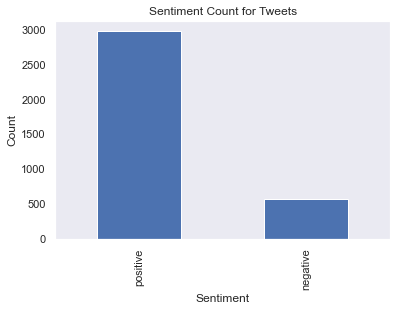

In [27]:
# value sentiments
sns.set_style("dark")
sentiment_count = df.sentiment.value_counts().rename('sum')
sentiment_perc = df.sentiment.value_counts(normalize=True).round(2).rename('percentage')
sentiment_values = pd.concat([sentiment_count, sentiment_perc], axis=1)
sentiment_values['sum'][1:].plot(kind='bar', title='Sentiment Count for Tweets', 
                                 xlabel='Sentiment', ylabel='Count');

In [9]:
# values counts for sentiment per brand
brand_sentiment = df[['sentiment','brand']].value_counts().unstack(level=-1)
brand_sentiment

brand,apple,google
sentiment,,
negative,388,131
neutral,65,26
positive,1949,723


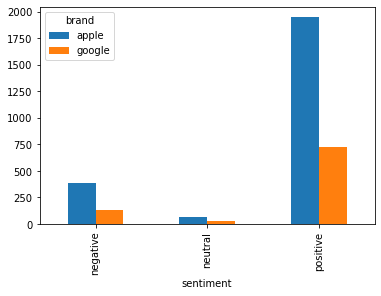

In [10]:
brand_sentiment.plot(kind='bar');